In [25]:
import networkx as nx
import networkx.algorithms.community as nxcom
from matplotlib import pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
import random


In [3]:
import os


In [4]:
pwd

'C:\\Users\\My PC'

In [5]:
os.chdir('C:\\Users\\My PC\\Desktop')

In [6]:
pwd

'C:\\Users\\My PC\\Desktop'

In [17]:
import numpy as np 
import pandas as pd

In [53]:
df_edges = pd.read_csv('file2.csv')
df_nodes = pd.read_csv('raw_data1.csv')


In [54]:
# get edges and weight
edges = df_edges[['source', 'target']].values.tolist()
G = nx.Graph(directed=True)

nodes = df_nodes['Source'].values.tolist()

G.add_nodes_from(nodes)
G.add_edges_from(edges)


In [55]:
import community
#The Louvain method of community detection is an algorithm for detecting communities in networks that relies upon a heuristic for maximizing the modularity.
#The method consists of repeated application of two steps. The first step is a "greedy" assignment of nodes to communities, favoring local optimizations of modularity.
#The second step is the definition of a new coarse-grained network in terms of the communities found in the first step. 
#These two steps are repeated until no further modularity-increasing reassignments of communities are possible. 

In [56]:
partition = community.best_partition(G)

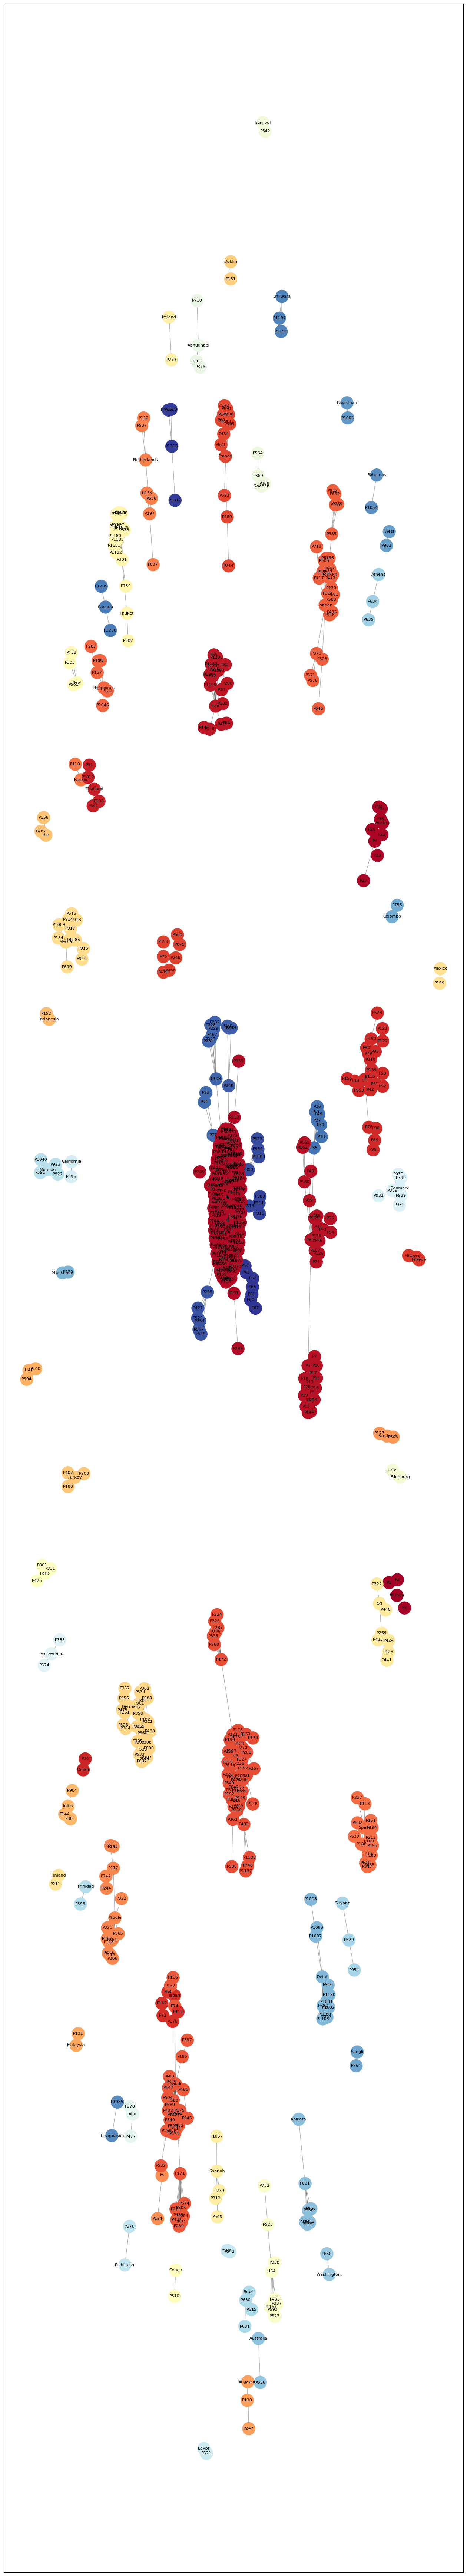

In [57]:
pos = nx.spring_layout(G)
plt.figure(figsize=(16,90))
plt.axis('on')
nx.draw_networkx_nodes(G, pos, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.xticks([])
plt.yticks([])
nx.draw_networkx_labels(G, pos, font_size=8, font_color="black")

plt.show(G)
#International Mitigation

In [58]:
print(community.modularity(partition,G))

0.90128173828125


In [61]:
df_edges = pd.read_csv('data2.csv')
df_nodes = pd.read_csv('file2.csv')


In [62]:
edges = df_edges[['Source', 'Target']].values.tolist()
G1 = nx.Graph(directed=True)

nodes = df_nodes['source'].values.tolist()

G1.add_nodes_from(nodes)
G1.add_edges_from(edges)


In [63]:
partition = community.best_partition(G1)
print(partition)

{'P6': 0, 'P4': 1, 'P35': 2, 'P29': 3, 'P51': 4, 'P43': 5, 'P64': 6, 'P30': 7, 'P41': 8, 'P78': 9, 'P73': 10, 'P77': 11, 'P74': 12, 'P95': 13, 'P146': 14, 'P81': 15, 'P138': 16, 'P160': 17, 'P153': 18, 'P171': 19, 'P157': 20, 'P172': 21, 'P108': 22, 'P117': 23, 'P248': 24, 'P201': 25, 'P132': 26, 'P191': 27, 'P182': 28, 'P295': 29, 'P285': 30, 'P389': 31, 'P196': 32, 'P269': 33, 'P297': 34, 'P150': 35, 'P159': 36, 'P380': 37, 'P369': 38, 'P370': 39, 'P362': 40, 'P630': 41, 'P632': 42, 'P634': 43, 'P486': 44, 'P525': 45, 'P301': 46, 'P348': 47, 'P385': 48, 'P316': 49, 'P469': 50, 'P717': 51, 'P681': 52, 'P493': 53, 'P523': 54, 'P514': 55, 'P922': 56, 'P629': 57, 'P513': 58, 'P1007': 59, 'P1317  ': 60, 'P1316': 61, 'Wuhan': 62, 'Austria': 63, 'Dubai': 64, 'Italy': 65, 'Iran': 66, 'Thailand': 67, 'Oman': 68, 'US': 69, 'Japan': 70, 'Greece': 71, 'Qatar': 72, 'France': 73, 'UK': 74, 'Saudi': 75, 'London': 76, 'Philippines': 77, 'Spain': 78, 'Russia': 79, 'Netherlands': 80, 'Middle': 81, 'to

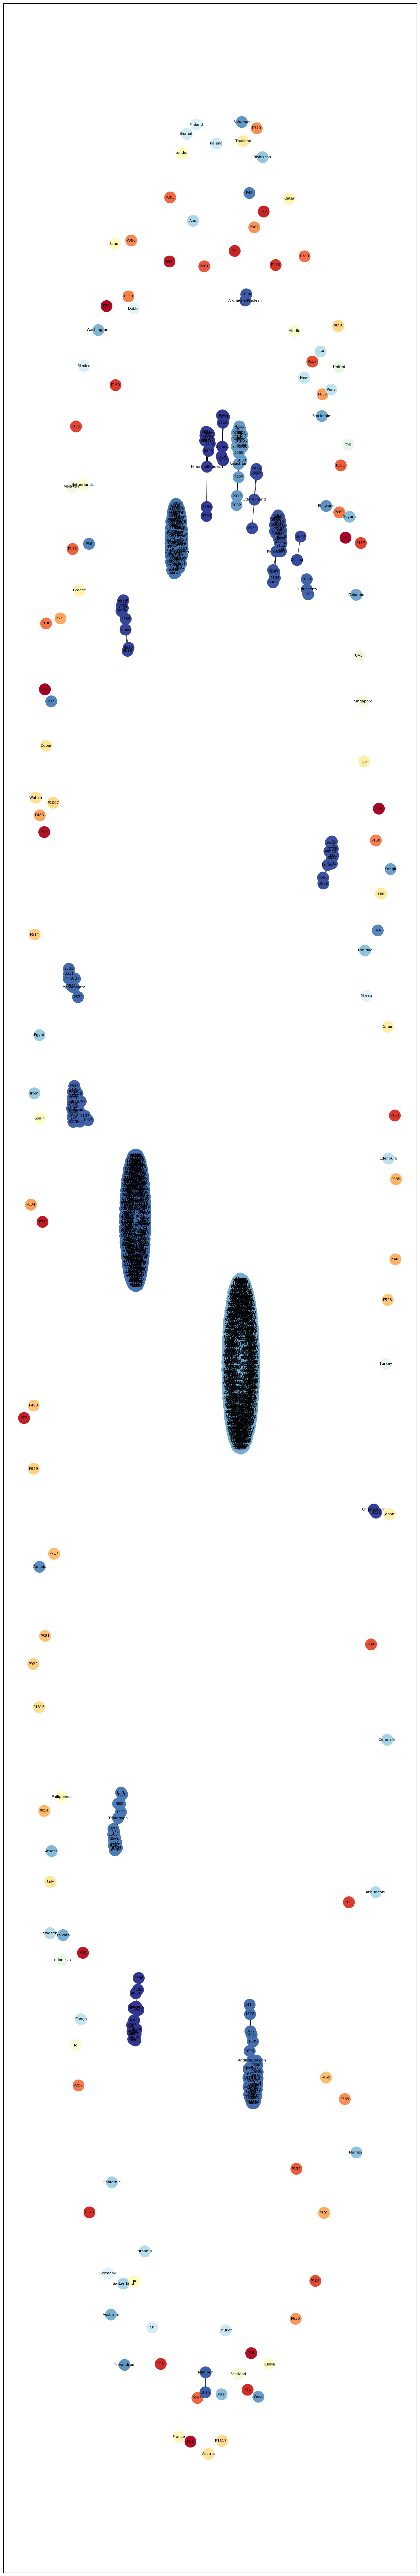

In [68]:
pos = nx.spring_layout(G1)
plt.figure(figsize=(16,100))
plt.axis('on')
nx.draw_networkx_nodes(G1, pos, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G1, pos, alpha=0.8)
plt.xticks([])
plt.yticks([])
nx.draw_networkx_labels(G1, pos, font_size=8, font_color="black")

plt.show(G1)
#Local Mitigation

In [67]:
print(community.modularity(partition,G1))

0.6043277938320442


In [39]:

from __future__ import print_function

import array

import numbers
import warnings

import networkx as nx
import numpy as np

from .community_status import Status

__author__ = """Thomas Aynaud (thomas.aynaud@lip6.fr)"""
#    Copyright (C) 2009 by
#    Thomas Aynaud <thomas.aynaud@lip6.fr>
#    All rights reserved.
#    BSD license.

__PASS_MAX = -1
__MIN = 0.0000001


def check_random_state(seed):
   
    if seed is None or seed is np.random:
        return np.random.mtrand._rand
    if isinstance(seed, (numbers.Integral, np.integer)):
        return np.random.RandomState(seed)
    if isinstance(seed, np.random.RandomState):
        return seed
    raise ValueError("%r cannot be used to seed a numpy.random.RandomState"
                     " instance" % seed)


def partition_at_level(dendrogram, level):
   
    partition = dendrogram[0].copy()
    for index in range(1, level + 1):
        for node, community in partition.items():
            partition[node] = dendrogram[index][community]
    return partition


def modularity(partition, graph, weight='weight'):
    
    if graph.is_directed():
        raise TypeError("Bad graph type, use only non directed graph")

    inc = dict([])
    deg = dict([])
    links = graph.size(weight=weight)
    if links == 0:
        raise ValueError("A graph without link has an undefined modularity")

    for node in graph:
        com = partition[node]
        deg[com] = deg.get(com, 0.) + graph.degree(node, weight=weight)
        for neighbor, datas in graph[node].items():
            edge_weight = datas.get(weight, 1)
            if partition[neighbor] == com:
                if neighbor == node:
                    inc[com] = inc.get(com, 0.) + float(edge_weight)
                else:
                    inc[com] = inc.get(com, 0.) + float(edge_weight) / 2.

    res = 0.
    for com in set(partition.values()):
        res += (inc.get(com, 0.) / links) - \
               (deg.get(com, 0.) / (2. * links)) ** 2
    return res


def best_partition(graph,
                   partition=None,
                   weight='weight',
                   resolution=1.,
                   randomize=None,
                   random_state=None):
   
    dendo = generate_dendrogram(graph,
                                partition,
                                weight,
                                resolution,
                                randomize,
                                random_state)
    return partition_at_level(dendo, len(dendo) - 1)


def generate_dendrogram(graph,
                        part_init=None,
                        weight='weight',
                        resolution=1.,
                        randomize=None,
                        random_state=None):
    
    if graph.is_directed():
        raise TypeError("Bad graph type, use only non directed graph")

    # Properly handle random state, eventually remove old `randomize` parameter
    # NOTE: when `randomize` is removed, delete code up to random_state = ...
    if randomize is not None:
        warnings.warn("The `randomize` parameter will be deprecated in future "
                      "versions. Use `random_state` instead.", DeprecationWarning)
        # If shouldn't randomize, we set a fixed seed to get determinisitc results
        if randomize is False:
            random_state = 0

    # We don't know what to do if both `randomize` and `random_state` are defined
    if randomize and random_state is not None:
        raise ValueError("`randomize` and `random_state` cannot be used at the "
                         "same time")

    random_state = check_random_state(random_state)

    # special case, when there is no link
    # the best partition is everyone in its community
    if graph.number_of_edges() == 0:
        part = dict([])
        for i, node in enumerate(graph.nodes()):
            part[node] = i
        return [part]

    current_graph = graph.copy()
    status = Status()
    status.init(current_graph, weight, part_init)
    status_list = list()
    __one_level(current_graph, status, weight, resolution, random_state)
    new_mod = __modularity(status, resolution)
    partition = __renumber(status.node2com)
    status_list.append(partition)
    mod = new_mod
    current_graph = induced_graph(partition, current_graph, weight)
    status.init(current_graph, weight)

    while True:
        __one_level(current_graph, status, weight, resolution, random_state)
        new_mod = __modularity(status, resolution)
        if new_mod - mod < __MIN:
            break
        partition = __renumber(status.node2com)
        status_list.append(partition)
        mod = new_mod
        current_graph = induced_graph(partition, current_graph, weight)
        status.init(current_graph, weight)
    return status_list[:]


def induced_graph(partition, graph, weight="weight"):
    
    ret = nx.Graph()
    ret.add_nodes_from(partition.values())

    for node1, node2, datas in graph.edges(data=True):
        edge_weight = datas.get(weight, 1)
        com1 = partition[node1]
        com2 = partition[node2]
        w_prec = ret.get_edge_data(com1, com2, {weight: 0}).get(weight, 1)
        ret.add_edge(com1, com2, **{weight: w_prec + edge_weight})

    return ret


def __renumber(dictionary):

    count = 0
    ret = dictionary.copy()
    new_values = dict([])

    for key in dictionary.keys():
        value = dictionary[key]
        new_value = new_values.get(value, -1)
        if new_value == -1:
            new_values[value] = count
            new_value = count
            count += 1
        ret[key] = new_value

    return ret


def load_binary(data):
    """Load binary graph as used by the cpp implementation of this algorithm
    """
    data = open(data, "rb")

    reader = array.array("I")
    reader.fromfile(data, 1)
    num_nodes = reader.pop()
    reader = array.array("I")
    reader.fromfile(data, num_nodes)
    cum_deg = reader.tolist()
    num_links = reader.pop()
    reader = array.array("I")
    reader.fromfile(data, num_links)
    links = reader.tolist()
    graph = nx.Graph()
    graph.add_nodes_from(range(num_nodes))
    prec_deg = 0

    for index in range(num_nodes):
        last_deg = cum_deg[index]
        neighbors = links[prec_deg:last_deg]
        graph.add_edges_from([(index, int(neigh)) for neigh in neighbors])
        prec_deg = last_deg

    return graph


def __one_level(graph, status, weight_key, resolution, random_state):
    """Compute one level of communities
    """
    modified = True
    nb_pass_done = 0
    cur_mod = __modularity(status, resolution)
    new_mod = cur_mod

    while modified and nb_pass_done != __PASS_MAX:
        cur_mod = new_mod
        modified = False
        nb_pass_done += 1

        for node in __randomize(graph.nodes(), random_state):
            com_node = status.node2com[node]
            degc_totw = status.gdegrees.get(node, 0.) / (status.total_weight * 2.)  # NOQA
            neigh_communities = __neighcom(node, graph, status, weight_key)
            remove_cost = - resolution * neigh_communities.get(com_node,0) + \
                (status.degrees.get(com_node, 0.) - status.gdegrees.get(node, 0.)) * degc_totw
            __remove(node, com_node,
                     neigh_communities.get(com_node, 0.), status)
            best_com = com_node
            best_increase = 0
            for com, dnc in __randomize(neigh_communities.items(), random_state):
                incr = remove_cost + resolution * dnc - \
                       status.degrees.get(com, 0.) * degc_totw
                if incr > best_increase:
                    best_increase = incr
                    best_com = com
            __insert(node, best_com,
                     neigh_communities.get(best_com, 0.), status)
            if best_com != com_node:
                modified = True
        new_mod = __modularity(status, resolution)
        if new_mod - cur_mod < __MIN:
            break


def __neighcom(node, graph, status, weight_key):
    """
    Compute the communities in the neighborhood of node in the graph given
    with the decomposition node2com
    """
    weights = {}
    for neighbor, datas in graph[node].items():
        if neighbor != node:
            edge_weight = datas.get(weight_key, 1)
            neighborcom = status.node2com[neighbor]
            weights[neighborcom] = weights.get(neighborcom, 0) + edge_weight

    return weights


def __remove(node, com, weight, status):
    """ Remove node from community com and modify status"""
    status.degrees[com] = (status.degrees.get(com, 0.)
                           - status.gdegrees.get(node, 0.))
    status.internals[com] = float(status.internals.get(com, 0.) -
                                  weight - status.loops.get(node, 0.))
    status.node2com[node] = -1


def __insert(node, com, weight, status):
    """ Insert node into community and modify status"""
    status.node2com[node] = com
    status.degrees[com] = (status.degrees.get(com, 0.) +
                           status.gdegrees.get(node, 0.))
    status.internals[com] = float(status.internals.get(com, 0.) +
                                  weight + status.loops.get(node, 0.))


def __modularity(status, resolution):
    """
    Fast compute the modularity of the partition of the graph using
    status precomputed
    """
    links = float(status.total_weight)
    result = 0.
    for community in set(status.node2com.values()):
        in_degree = status.internals.get(community, 0.)
        degree = status.degrees.get(community, 0.)
        if links > 0:
            result += in_degree * resolution / links -  ((degree / (2. * links)) ** 2)
    return result


def __randomize(items, random_state):
    """Returns a List containing a random permutation of items"""
    randomized_items = list(items)
    random_state.shuffle(randomized_items)
    return randomized_items